## LASSO (Least Absolute Shrinkage and Selection Operator) 
is a regression technique used to create predictive models by simplifying the model structure. It helps improve model performance, especially when dealing with many variables, by selecting only the most important predictors.

###### How Does LASSO Work?
1. Basic Idea: When building a model, we often have multiple input variables (features) that might help predict the outcome. However, not all of these variables are useful. Some may add noise or unnecessary complexity. LASSO reduces the influence of less important variables, simplifying the model.

2. Regularization: 
LASSO applies regularization by adding a penalty to the size of the model's coefficients. This penalty discourages the model from assigning large coefficients to many variables.

3. Shrinking Coefficients: 
The unique feature of LASSO is that it can shrink some coefficients down to zero, effectively removing those variables from the model. This results in a simpler, more interpretable model by selecting only the most significant features.

4. Outcome: LASSO helps prevent overfitting, a situation where a model fits the training data too closely and fails to generalize to new data. A simpler model with fewer predictors often performs better on unseen data.

###### Why Use LASSO?
Simplicity: It creates a simpler, more interpretable model by selecting only the most important predictors.
Performance: LASSO can enhance model performance on new data by reducing overfitting.
Feature Selection: It automatically selects relevant features, which is particularly useful for datasets with many potential predictors.
###### Example
Suppose you're predicting house prices based on features like size, number of bedrooms, location, and age. LASSO might find that "age of the house" doesn't significantly affect the price and assign it a coefficient of zero. Therefore, the "age" variable is removed from the model, and the focus shifts to more relevant factors like size and location.

###### LASSO as L1 Regularization
LASSO is also referred to as L1 regularization because it penalizes the sum of the absolute values of the coefficients. The regularization term is given by:

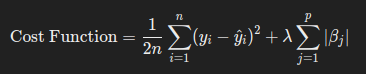

where ( \lambda ) is the shrinkage factor.

## What is Ridge Regression?
Ridge regression is a technique in regression analysis that applies regularization to prevent overfitting and improve prediction accuracy. It is especially useful when dealing with multicollinearity, which occurs when independent variables are highly correlated.

##### How Does Ridge Regression Work?
1. Basic Idea: Ridge regression improves model stability by adding a penalty to the regression coefficients. This is particularly helpful when there are many correlated independent variables, as it reduces the impact of collinearity.
   
2. Regularization (L2 Penalty):
Ridge regression adds a regularization term to the cost function. This term is the sum of the squared coefficients, which helps to shrink them towards zero but not exactly to zero. This is why it is called L2 regularization.

The modified cost function for Ridge regression is:

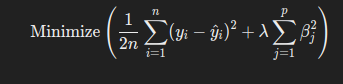

where ( \lambda ) is the regularization parameter controlling the strength of the penalty, and ( \beta_j ) represents the coefficients.

3. Effect of Regularization
The L2 penalty in ridge regression discourages large coefficients but does not reduce any coefficients to zero. Unlike LASSO, which can eliminate features by shrinking their coefficients to zero, ridge regression keeps all variables in the model, but their coefficients are reduced.

4. Outcome
Ridge regression helps reduce variance (the model’s tendency to overfit), resulting in improved performance on new, unseen data. By shrinking the coefficients, it makes the model less sensitive to the noise in the training data.

###### Why Use Ridge Regression?
Handles Multicollinearity: Ridge regression stabilizes coefficient estimates when predictors are highly correlated, making them more reliable.
Prevents Overfitting: The penalty on large coefficients reduces overfitting, ensuring the model generalizes better to new data.
Retains All Features: Unlike LASSO, ridge regression does not remove any features. All features remain in the model with their coefficients adjusted.

##### Example
Consider predicting rainfall using weather conditions like temperature, humidity, and wind speed. If these variables are highly correlated, ordinary least squares (OLS) regression may overfit the data, leading to poor performance on new data. Applying ridge regression adds a penalty to the coefficients, especially for correlated predictors, resulting in a more robust model that performs better on new data.

#### Ridge Regression as L2 Regularization
Ridge regression is known as L2 regularization because it penalizes the model based on the sum of the squares of the coefficients. The regularization term is:

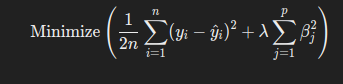

where ( \lambda ) is the regularization parameter.

In [4]:
#Lasso eliminates features which do no have a relationship with the label
#Eidge does not eliminates features which do no have a relationship with the label but rather gives them less weightage

## Key Differences Between Ridge and LASSO
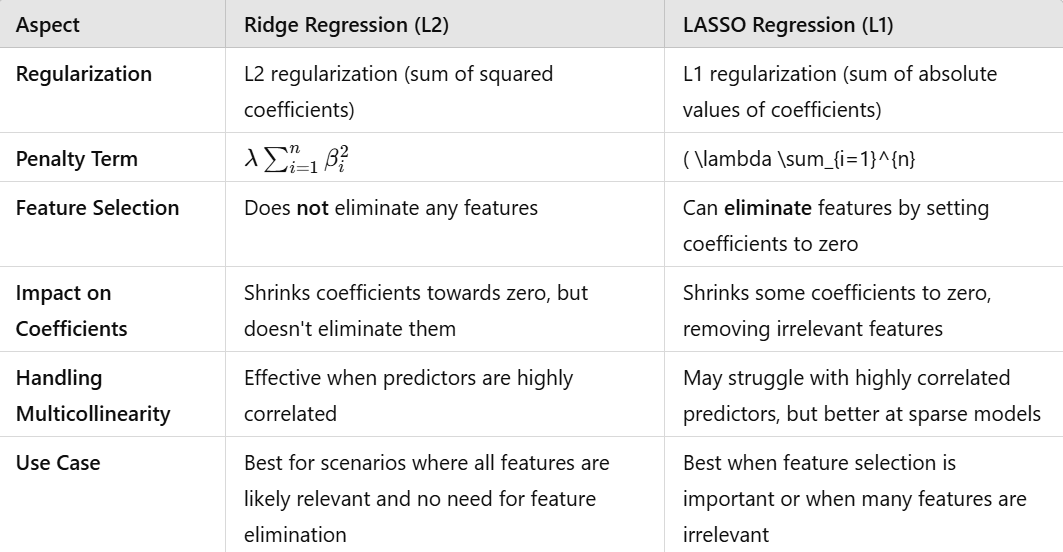

## Problem Statement
We need to predict the chance of admission based on he student various scores .

##### --> __Feature or independent Variables

GRE Score

TOEFL Score

SOP

LOR

CGPA

Research

##### -->__Label/Target

Chance of Admission

In [64]:
#Importing Necessary Libraries.
import pandas as pd
import numpy as np

#Importing Libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Importing Libraries and Metrics from Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


#Importing to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [66]:
data_db=pd.read_csv(r"C:\Users\sharm\Downloads\Admission_Predict500.csv")

In [68]:
data_db.shape

(500, 9)

In [70]:
data_db.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,498.000000,496.000000,498.000000,496.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,249.514056,316.471774,107.182731,3.106855,3.374000,3.48400,8.576440,0.560000,0.72174
std,143.928766,11.301167,6.092244,1.143569,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.250000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,249.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,373.750000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [72]:
#fill the null values

#mode for categorical data and mean for continuous data
data_db['University Rating']=data_db['University Rating'].fillna(data_db['University Rating'].mode()[0])
data_db['TOEFL Score']=data_db['TOEFL Score'].fillna(data_db['TOEFL Score'].mean())
data_db['GRE Score']=data_db['GRE Score'].fillna(data_db['GRE Score'].mean())

In [74]:
data_db.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,498.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,249.514056,316.471774,107.182731,3.106000,3.374000,3.48400,8.576440,0.560000,0.72174
std,143.928766,11.255781,6.080023,1.139017,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.250000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,249.500000,316.735887,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,373.750000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [76]:
#Lets Delete the unwanted columns
data_db.drop(columns=['Serial No.'],inplace=True)

In [78]:
data_db.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.000000,3.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.000000,4.0,4.0,4.5,8.87,1,0.76
2,316.000000,104.000000,3.0,3.0,3.5,8.00,1,0.72
3,316.471774,107.182731,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.000000,2.0,2.0,3.0,8.21,0,0.65


In [84]:
x=data_db.drop(columns=['Chance of Admit'])
y=data_db['Chance of Admit']

#standardise data

scaler=StandardScaler()

In [88]:
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.82562061e+00,  1.78093127e+00, -9.31559411e-02, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.69501803e-01, -3.00844154e-02,  7.85673692e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [-4.19559244e-02, -5.23997784e-01, -9.31559411e-02, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.20309510e+00,  2.11020685e+00, -9.31559411e-02, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [ 5.05521120e-15, -6.88635574e-01,  7.85673692e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.36298451e-01,  9.57742323e-01, -9.31559411e-02, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [92]:
#split the data set

x_train,x_test,y_train,y_test =train_test_split(x_scaled,y,test_size=0.25,random_state=(94255))
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

## Why we use Regularization --
If your model is learning too fast we have to pull it or  we have to penalise. We have to make it learn as slow as possible so that it achieve the better result thats why we need regularization.

In [14]:
#cv-cross validation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

### Lasso Regression Model

In [96]:
#LASSOCV will return best alpha after max iteration
#normalize is subtracting the mean and divide by L2_norm

lassocv=LassoCV(alphas=None,max_iter=100)
lassocv.fit(x_train,y_train)

LassoCV(max_iter=100)

## Max Iteration (max_iter):
The number of iterations you need depends on the size and complexity of your dataset. Larger datasets may require more iterations for convergence.



## Normalization:
Normalization is very similar to standardization—they are like siblings. Normalizing data scales each feature to a specific range, typically [0, 1], which helps algorithms perform better. Before diving deeply into data preprocessing techniques, I suggest starting with normalization as a foundational step.

In [102]:
#give best alpha parameter
alpha=lassocv.alpha_
print(alpha)

0.00014579541631124367


In [106]:
#Now that we have best alpha parameter, lets use Lasso regression and see how well our data has fitted than before
#create lasso regression model based on alpha value
lasso_reg=Lasso(alpha)
#trains a lasso regression model using the provided training data
lasso_reg.fit(x_train,y_train) 

Lasso(alpha=np.float64(0.00014579541631124367))

In [108]:
#check score
lasso_reg.score(x_test,y_test)

0.8253215381164132

So, what does this indicate? We tried Lasso regression because we suspected that linear regression might be overfitting. However, since both linear regression and Lasso regression are yielding similar results, it suggests that our model is not overfitting. Therefore, the conclusion we can draw here is that our model is not overfitted.

### Ridge Regression Model
Ridge will return best alpha and coefficients after performing 10 Cross validation.

In [128]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

This time, we are applying a different method. Of course, you can remove alpha = np.arange(0.001, 0.1, 0.001) or even keep it as None. We need to learn various approaches. Remember, as I mentioned earlier, the model will first try 0.001, then 0.002, 0.003, 0.004, and so on. It iterates through different learning rates during the process, which can be time-consuming.

In our dataset, we have very few columns and records. However, in real-world scenarios, we won’t just have 8 or 9 columns or features. Instead, we will often deal with thousands of features and millions of observations. When applying Lasso regression in such cases, processing all the data becomes computationally intensive. The model needs to process each feature one by one, which consumes a lot of time and resources.

Why do I say it’s a waste of time? It’s not just about time—it directly impacts costs as well. Training models on personal laptops isn’t feasible for large-scale data. Instead, we need to rely on third-party platforms.

You’ve probably heard of AWS, GCP, and Azure—I’ll discuss them in detail later. These cloud platforms allow us to train models efficiently, but they come at a cost. If we connect to any of these platforms, we need to pay for the resources used during training.

To address this, we should avoid trying all possible values of alpha. Don’t start testing from one extreme to the other. Instead, I will provide a smaller range. Focus on this range to find the best value of alpha that minimizes error. This approach will save time, resources, and cost.



In [132]:
#get best alpha parameter
alpha=ridgecv.alpha_
print(alpha)

0.09099999999999998


In [134]:
#create a ridge regression model with best alpha value
ridge_reg=Ridge(alpha)
ridge_reg

Ridge(alpha=np.float64(0.09099999999999998))

In [136]:
#trains a Ridge regression model using the provided training data
ridge_reg.fit(x_train,y_train)

Ridge(alpha=np.float64(0.09099999999999998))

In [138]:
#check score
ridge_reg.score(x_test,y_test)

0.8252383307590454

We got around the same R² score using Ridge regression as well. Therefore, it’s safe to say there is no overfitting.

Now, you might ask why we ran all these models. As a data scientist, I aim to maximize accuracy—this is where my "greediness" comes in, as I always strive for the best possible results.

##### Key Points:
In real-world scenarios, we don’t rely on just one model.
Instead, we build multiple models for the same problem because each model behaves differently and interprets patterns in its unique way. For example, one model might yield 50% accuracy, while another achieves 60%. I cannot know which model will perform better until I build and evaluate them.
The goal is to get the best accuracy.
By building multiple models, we can compare their performance and select the one that delivers the best results for the task. This is a standard practice in real-world projects—we never depend solely on one model.
Observations:
By using different types of regularization techniques, we are still getting the same R² score. This indicates that the Ordinary Least Squares (OLS) model is well-trained on the data, and there is no overfitting.

##### Assumptions of Linear Regression:
The regression model is linear in terms of coefficients and error terms.
The mean of the residuals (errors) is zero.
The error terms are not correlated with each other.
In other words, given one error value, we cannot predict the next error value.
No multicollinearity:
Independent variables should not be correlated with each other. If multicollinearity exists, it reduces the precision of the predictions made by the OLS model.

The error terms are normally distributed.